In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [98]:
def subplot_imgs(output, titles):
  figure(figsize=(20, 20), dpi = 80)
  l = len(output)
  for i in range(l):
    plt.subplot(1, l, i+1)
    plt.imshow(cv2.cvtColor(output[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
  plt.show()

# Answer to the question no 1

In [75]:
cell_img = cv2.imread('/content/cell_image.png', 0)

def pixelVal(px, r1, s1, r2, s2):
  if (0 <= px and px <= r1):
    return (s1 / r1) * px
  elif (r1 < px and px <= r2):
    return ((s2 - s1) / (r2 - r1)) * (px - r1) + s1
  else:
    return ((255 - s2) / (255 - r2)) * (px - r2) + s2

def contrast_stretching(img, r1, s1, r2, s2):
  pixelVal_vec = np.vectorize(pixelVal)
  contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)
  return contrast_stretched

equ = cv2.equalizeHist(cell_img) # Histogram Equalization

r1 = 135
s1 = 0
r2 = 137
s2 = 255
cs = contrast_stretching(cell_img, r1, s1, r2, s2) # Contrast Stretching

Answer1:

		Input Image 					Output Image 				Output Image



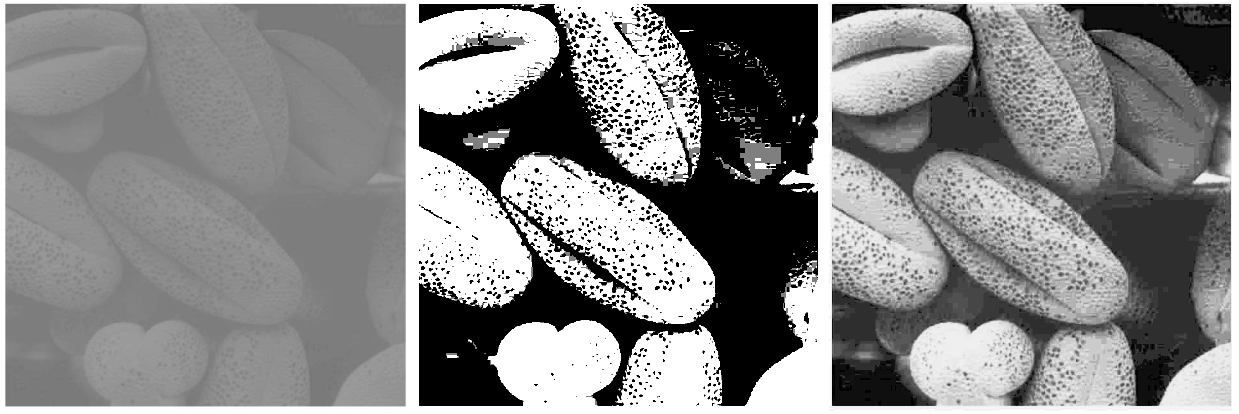

In [81]:
print('Answer1:\n')
print('\t\tInput Image', '\t\t\t\t\tOutput Image', '\t\t\t\tOutput Image\n')
res = np.hstack((cell_img, cs, equ))
cv2_imshow(res)

# Answer to the question no 3

In [83]:
img = cv2.imread('/content/labfinal.png')
#cv2_imshow(img)

a

In [87]:
(b, g, r) = cv2.split(img)
print('red: ', r)
print('green: ', g)
print('blue: ', b)

red:  [[  0   2   5 ... 248 250 253]
 [  0   2   5 ... 248 250 253]
 [  0   2   5 ... 248 250 253]
 ...
 [  0   2   5 ... 248 250 253]
 [  0   2   5 ... 248 250 253]
 [  0   2   5 ... 248 250 253]]
green:  [[  0   0   0 ...   0   0   0]
 [  2   2   2 ...   2   2   2]
 [  5   5   5 ...   5   5   5]
 ...
 [248 248 248 ... 248 248 248]
 [250 250 250 ... 250 250 250]
 [253 253 253 ... 253 253 253]]
blue:  [[  0   0   0 ...  23  23  23]
 [  0   0   0 ...  23  23  23]
 [  0   0   0 ...  23  23  23]
 ...
 [230 230 230 ... 253 253 253]
 [230 230 230 ... 253 253 253]
 [230 230 230 ... 253 253 253]]


b

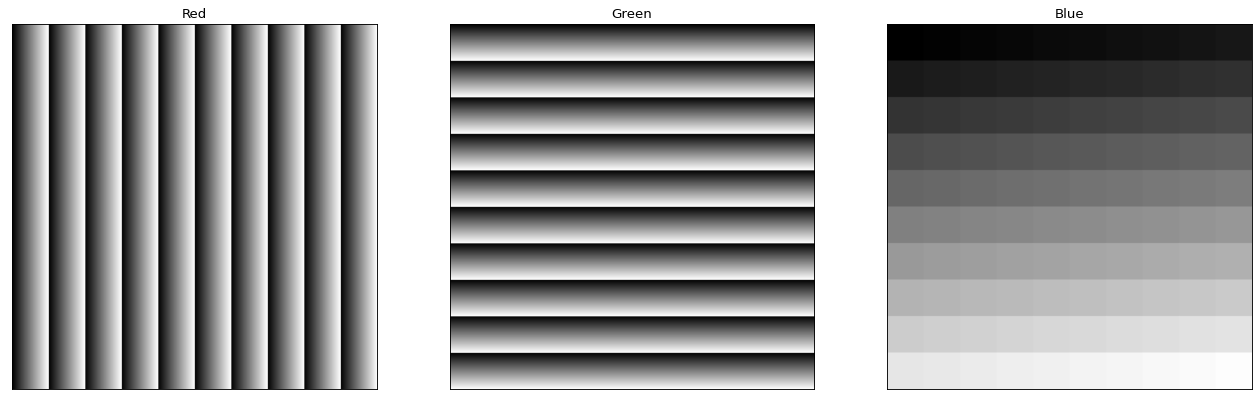

In [89]:
(b, g, r) = cv2.split(img)

output = [r, g, b]
titles = ['Red', 'Green', 'Blue']
subplot_imgs(output, titles)

c

In [93]:
h, w = img.shape[:2]
odd = []
even = []
for i in range(0, h):
  for j in range(0, w):
    if i % 2 == 0:
      even.append(img[i, j])
    else:
      odd.append(img[i, j])

d

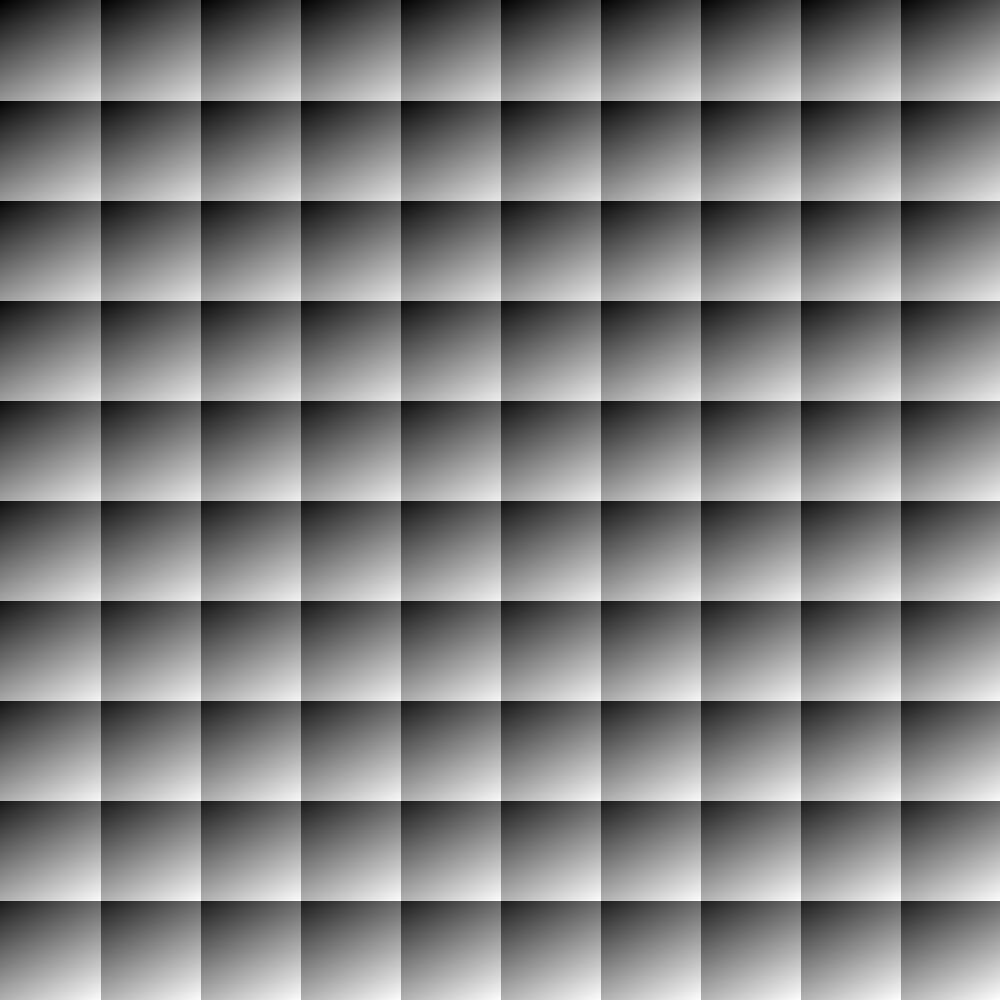

original:  (1000, 1000, 3)
gray:  (1000, 1000)


In [90]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
cv2_imshow(gray)
print('original: ', img.shape)
print('gray: ', gray.shape)

e

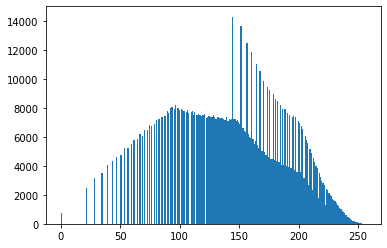

In [99]:
img = cv2.imread('/content/labfinal.png', 0)
#hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256]); plt.show()
#plt.hist(hist)
plt.show()